# EDA

## Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import pca

## Reading The Data

In [113]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [114]:
train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis=1)

## EDA

## Structure of Dataset

In [214]:
train['target'].value_counts().values

array([160,  90], dtype=int64)

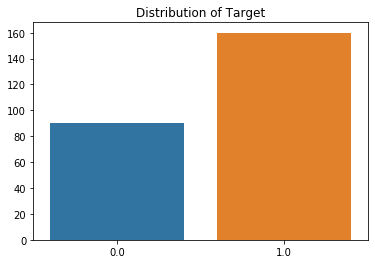

Class 0 count: 160
Class 1 count: 90


In [220]:
sns.barplot(x=train['target'].value_counts().index, y=train['target'].value_counts().values)
plt.title('Distribution of Target')
plt.show()
print("Class 0 count: {}".format(train['target'].value_counts().values[0]))
print("Class 1 count: {}".format(train['target'].value_counts().values[1]))

Dataset is slightly imbalanced<br>
we need to apply SMOTE to get the dataset balanced.

## Mean, Variance and Std-dev

In [224]:
train[train['target']==0].describe()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.0,-0.121467,0.071600,0.187989,-0.013644,0.159656,0.056700,0.108489,0.073111,0.025200,...,-0.008744,0.054267,0.131356,0.031833,-0.020744,0.129478,0.036900,-0.069067,0.190144,-0.031411
std,0.0,1.056915,1.045739,1.018651,1.038702,0.894437,0.935519,0.857763,1.006417,0.975428,...,0.893745,0.932227,1.058015,0.912677,1.006868,1.067265,1.070503,0.920606,0.963957,0.907582
min,0.0,-2.319000,-2.384000,-2.004000,-2.294000,-2.055000,-2.493000,-1.952000,-3.444000,-2.768000,...,-1.830000,-2.443000,-2.757000,-2.189000,-2.110000,-3.072000,-2.634000,-2.776000,-2.535000,-2.089000
25%,0.0,-0.870250,-0.788750,-0.390500,-0.680750,-0.407250,-0.632750,-0.544500,-0.438750,-0.511250,...,-0.572250,-0.525000,-0.539250,-0.612750,-0.798000,-0.464250,-0.638000,-0.803000,-0.277500,-0.710250
50%,0.0,-0.095500,0.159000,0.138000,-0.027500,0.059000,0.114000,0.142500,0.292500,-0.025000,...,-0.021000,0.026000,0.250500,-0.021000,0.019000,0.254500,0.056000,-0.021000,0.124000,0.019000
75%,0.0,0.472750,0.813500,0.616500,0.695000,0.763750,0.679000,0.675500,0.750500,0.700000,...,0.621500,0.652500,0.801500,0.569000,0.764750,0.757000,0.617000,0.661000,0.757500,0.653250
max,0.0,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.181000,1.700000,2.512000,...,2.865000,2.641000,2.736000,2.596000,1.990000,3.131000,3.236000,2.058000,2.440000,2.559000


In [225]:
train[train['target']==1].describe()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1.0,0.104719,-0.082263,0.155825,0.010650,-0.087325,-0.043306,-0.010944,0.081394,-0.071863,...,0.074688,0.166888,-0.045081,-0.03680,-0.091019,-0.238631,0.051856,0.048931,-0.092313,-0.183819
std,0.0,0.957641,0.987241,1.026437,0.999466,1.099547,0.967910,1.081643,0.903317,0.958321,...,1.073481,0.995114,0.887752,0.98853,1.087094,1.000955,0.908211,1.040873,1.021018,1.003847
min,1.0,-2.176000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-2.454000,-2.586000,...,-2.804000,-2.150000,-2.599000,-2.46600,-3.287000,-2.444000,-2.268000,-2.434000,-3.211000,-3.500000
25%,1.0,-0.522250,-0.724750,-0.516500,-0.681500,-0.880250,-0.641500,-0.789500,-0.585250,-0.729750,...,-0.657750,-0.484250,-0.525250,-0.73725,-0.913750,-0.920750,-0.576250,-0.724000,-0.722000,-0.777250
50%,1.0,0.014000,0.026500,0.200000,-0.004500,-0.079000,-0.023500,-0.041000,0.107500,-0.012500,...,0.076500,0.128000,-0.034000,-0.02100,-0.013500,-0.282500,-0.046500,0.020000,-0.072500,-0.147000
75%,1.0,0.706250,0.568000,0.869250,0.722500,0.678750,0.641250,0.815000,0.814500,0.614750,...,0.851250,0.836500,0.563250,0.69200,0.734500,0.406750,0.731250,0.864000,0.489000,0.388000
max,1.0,2.347000,2.183000,2.493000,2.602000,2.453000,2.328000,2.546000,2.846000,2.486000,...,2.559000,2.801000,2.415000,2.52300,2.226000,2.902000,2.330000,2.626000,3.530000,2.771000


Seems like data set is already scaled to some extent, since min and max value of each feature is greater than -5 and less than 5

# Univariate analysis

## Distribution of features/PDF

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
for row in ax:
    for col in row:
        col.plot(x, y)

plt.show()

Distributions of first 28 columns


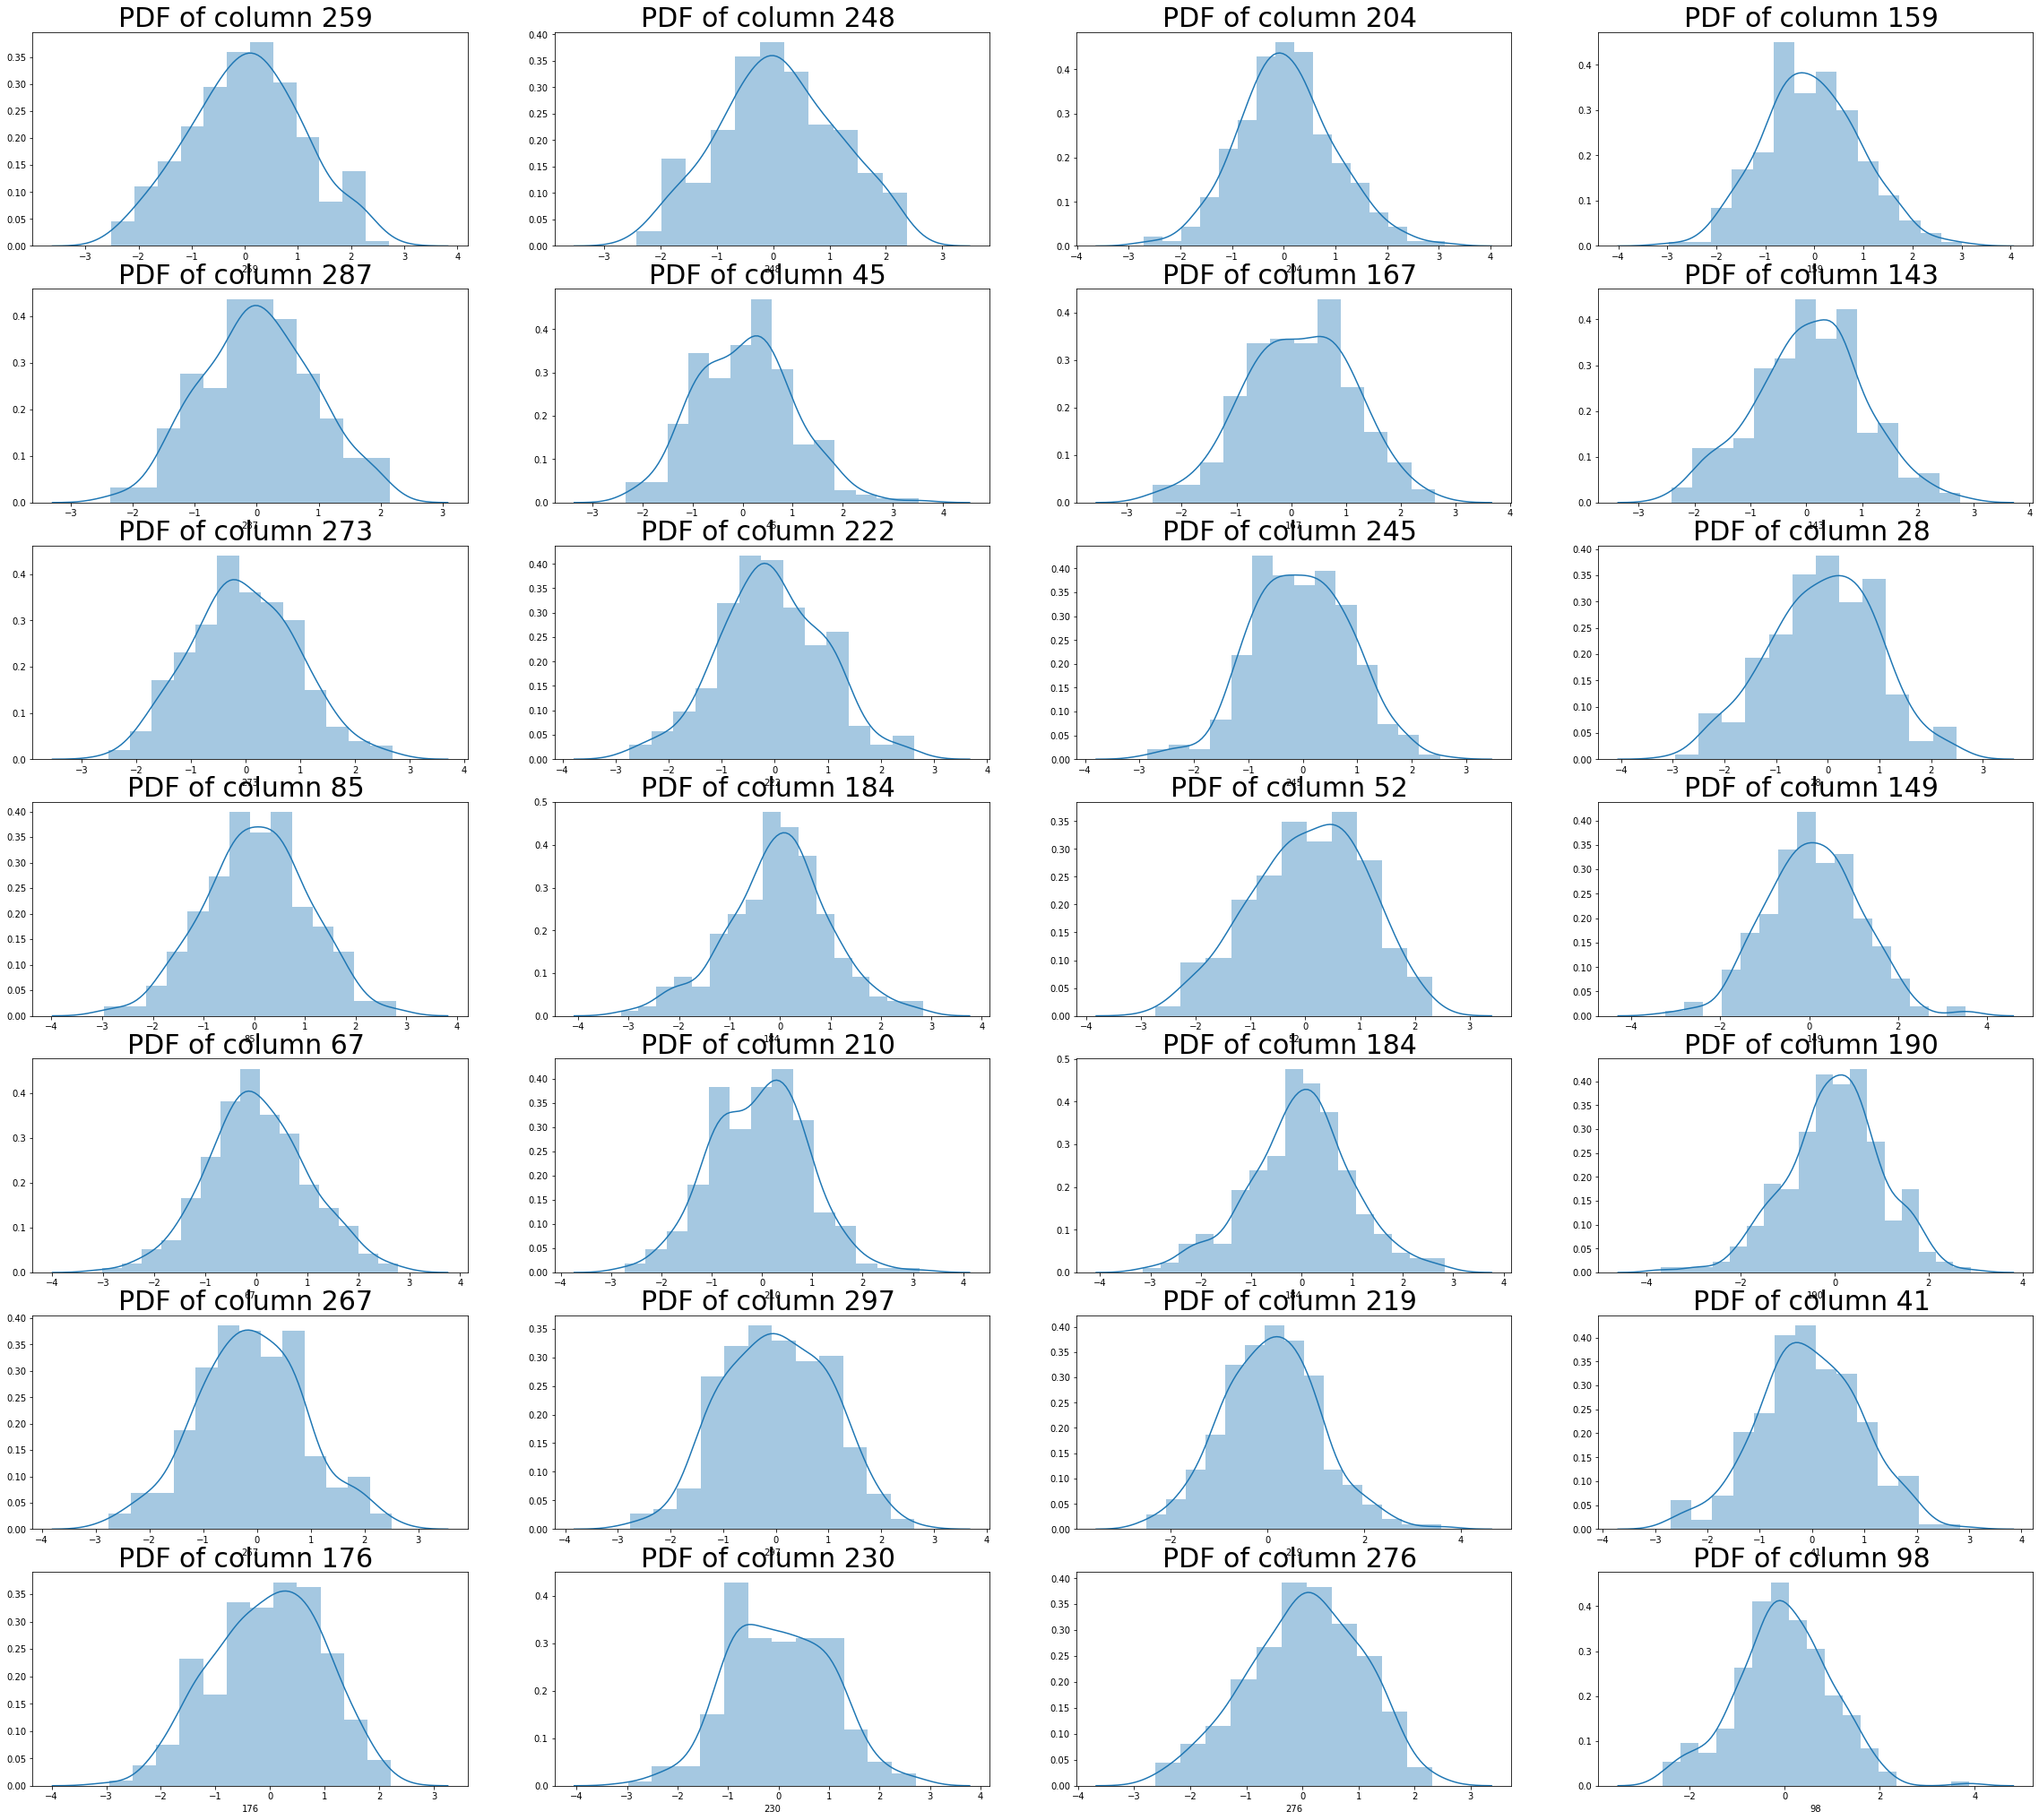

In [178]:
# Generating Random Numbers refer:-  https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint
# Applied AI Course - EDA
# Seaborn Distplot:- https://seaborn.pydata.org/generated/seaborn.distplot.html
print('Distributions of first 28 columns')

fig, axes = plt.subplots(7,4, figsize=(40,36))
r = np.random.randint(0,299,28,dtype=int) 

for i in range(7):
    for j in range(4):
        sns.distplot(train[str(r[4*i + j])], ax=axes[i,j])
        axes[i,j].set_title('PDF of column {} '.format(r[4*i + j]), fontsize= 30)
plt.show()

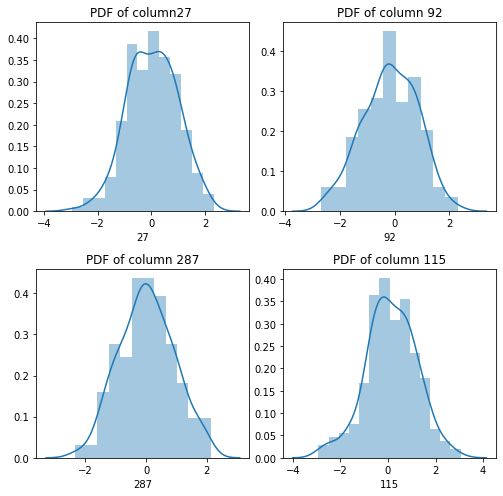

In [91]:
# Subplotting reference:- https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot
# Seaborn distplot:- https://seaborn.pydata.org/generated/seaborn.distplot.html)

fig, axes = plt.subplots(2,2, figsize=(7,7))
r = np.random.randint(0,299,4,dtype=int)

sns.distplot(train[str(r[0])], ax=axes[0,0])
axes[0,0].set_title('PDF of column{} '.format(r[0]))

sns.distplot(train[str(r[1])], ax=axes[0,1])
axes[0,1].set_title('PDF of column {}'.format(r[1])) 

sns.distplot(train[str(r[2])], ax=axes[1,0])
axes[1,0].set_title('PDF of column {}'.format(r[2])) 

sns.distplot(train[str(r[3])], ax=axes[1,1])
axes[1,1].set_title('PDF of column {}'.format(r[3]))
axes[1,1].get_xaxis().set_visible(False)

fig.tight_layout()
plt.show()

After running several times, it seems that most of them have similar distribution.

## CDF Plots

CDF plott of random 28 columns


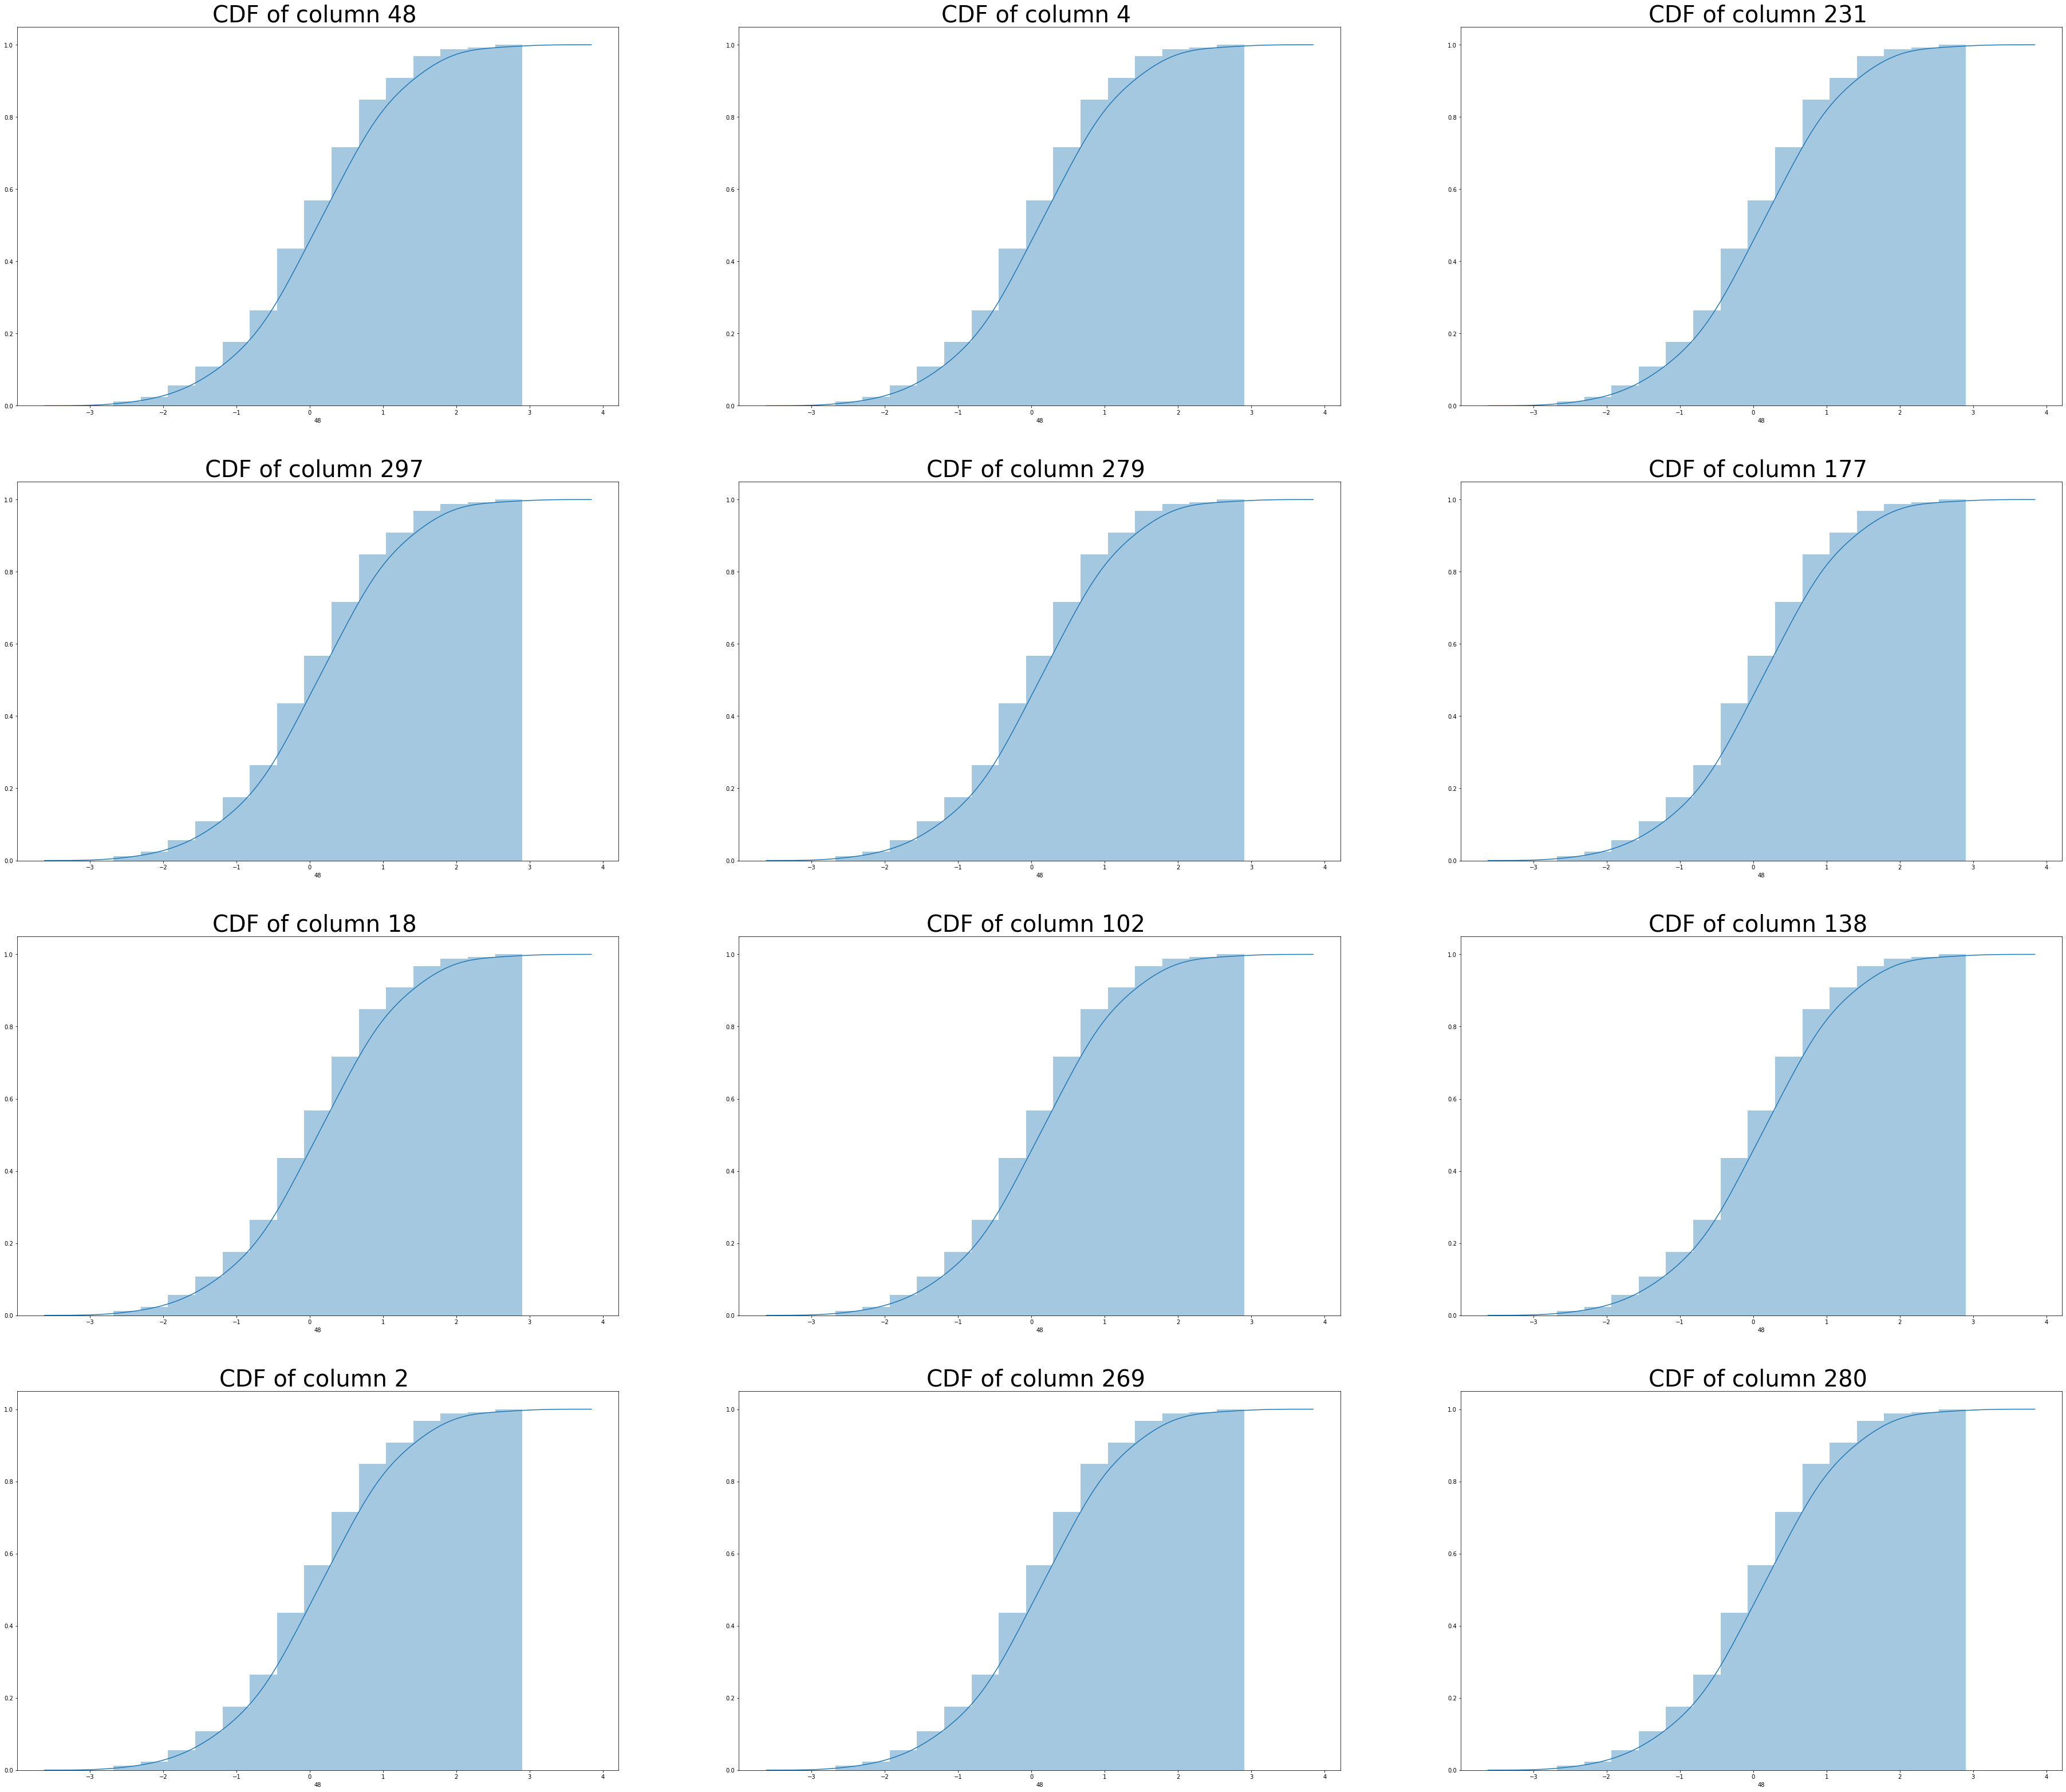

In [199]:
# Generating Random Numbers refer:-  https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint
# Applied AI Course - EDA
# Seaborn Distplot:- https://seaborn.pydata.org/generated/seaborn.distplot.html
print('CDF plott of random 28 columns')

fig, axes = plt.subplots(4,3, figsize=(64,56))
r = np.random.randint(0,299,12,dtype=int) 

for i in range(4):
    for j in range(3):
        sns.distplot(train[str(r[0])], ax=axes[i,j], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
        axes[i,j].set_title('CDF of column {} '.format(r[3*i + j]), fontsize= 40)
plt.show()

Most features have CDF distribution also<br>
which means we it will be difficult to differentiate features by considering pdf/cdf plots

## Scatter Plot

Scatter Plot


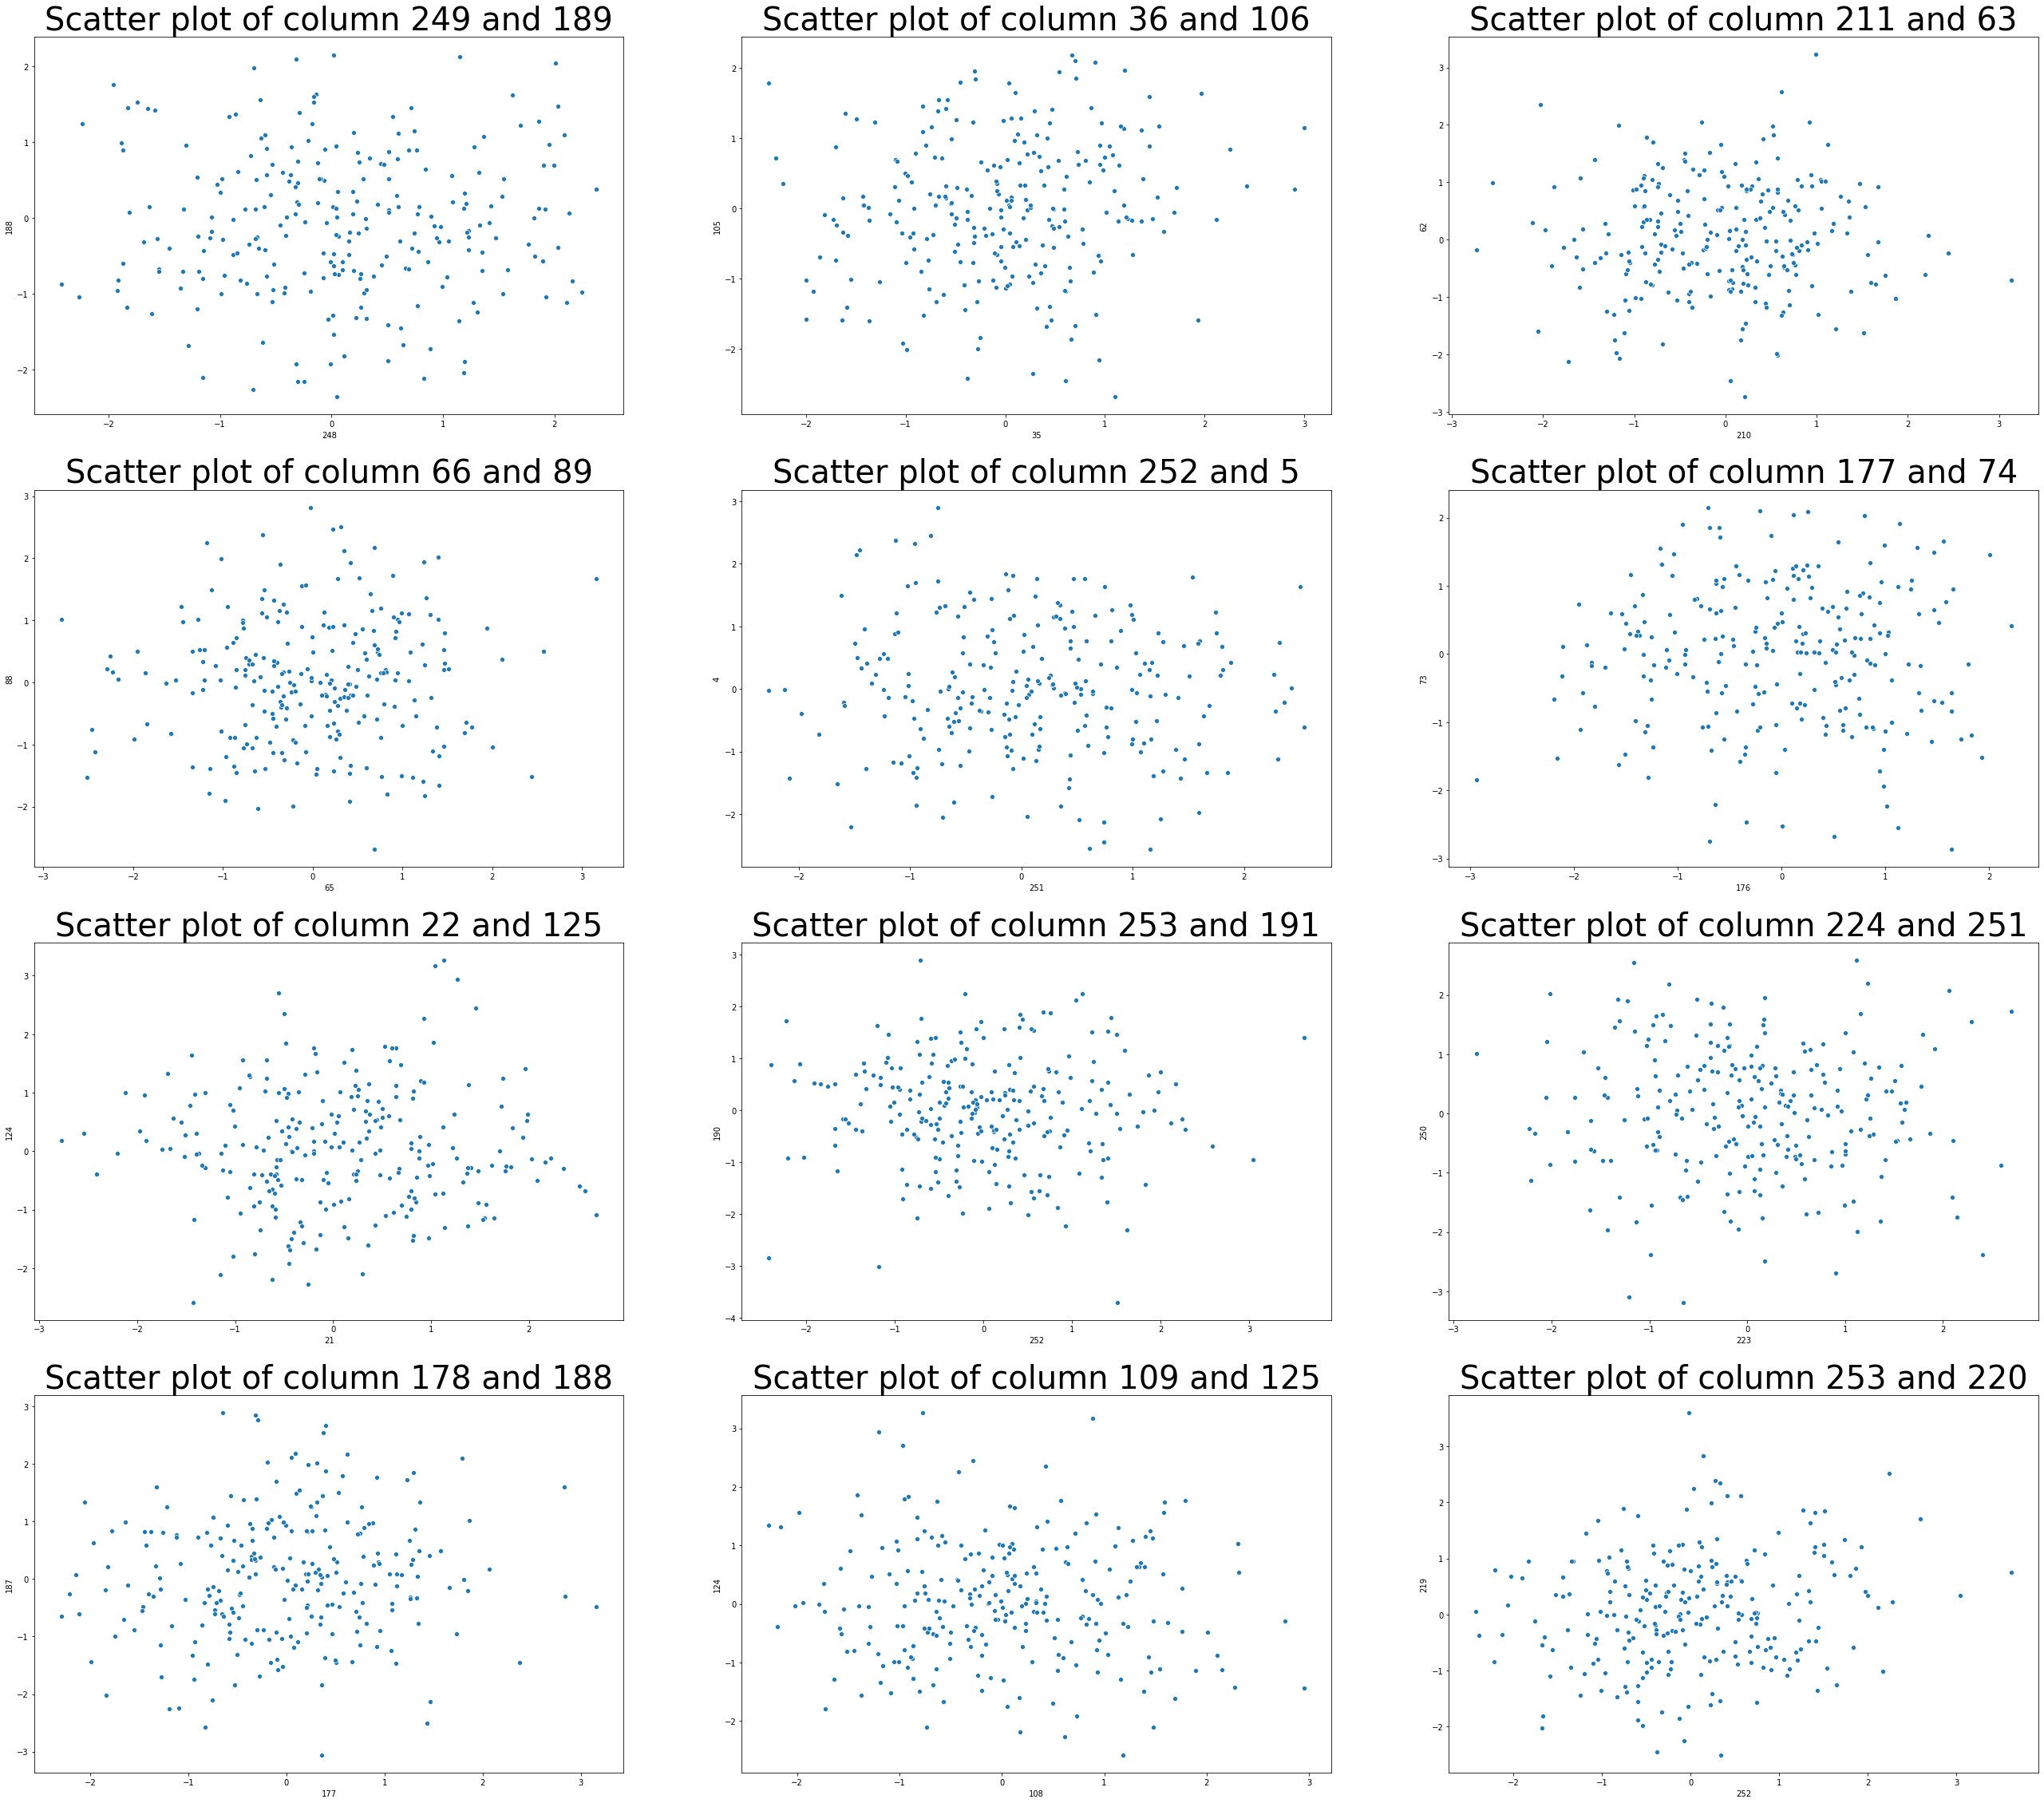

In [205]:
# Generating Random Numbers refer:-  https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint
# Applied AI Course - EDA
# Seaborn Distplot:- https://seaborn.pydata.org/generated/seaborn.distplot.html

print('Scatter Plot')

fig, axes = plt.subplots(4,3, figsize=(45,40))

for i in range(4):
    for j in range(3):
        r = np.random.randint(0,299,2)
        sns.scatterplot(x = train.iloc[:, r[0]], y = train.iloc[:, r[1]], ax=axes[i,j]) 
        axes[i,j].set_title('Scatter plot of column {} and {}'.format(r[0], r[1]), fontsize= 40)
plt.show()

Again we cannot interpret anything from scatter plot, let's see with  box plot and violin plots

## BoxPot

Box Plot


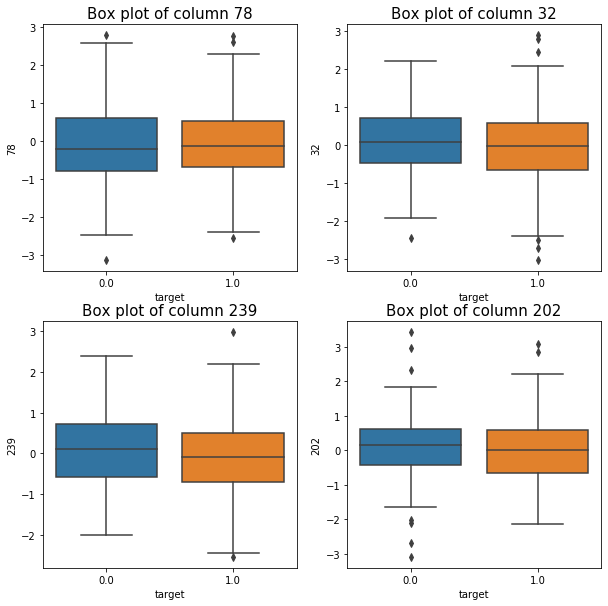

In [244]:
# Seaborn boxplot:- https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

print('Box Plot')

fig, axes = plt.subplots(2,2, figsize=(10,10))

for i in range(2):
    for j in range(2):
        r = np.random.randint(0,299,1)
        
        sns.boxplot(x=train['target'], y=train[str(r[0])], ax=axes[i,j])
        axes[i,j].set_title('Box plot of column {}'.format(r[0]), fontsize= 15)
plt.show()

1. Seems like, Median of both target class 0 and 1 have similar distribution
2. We got very important conclusion from the above plots, that dataset may contain some outlier according to the boxPlot, i.e we need to take some measures for it.

## ViolinPlot

Box Plot


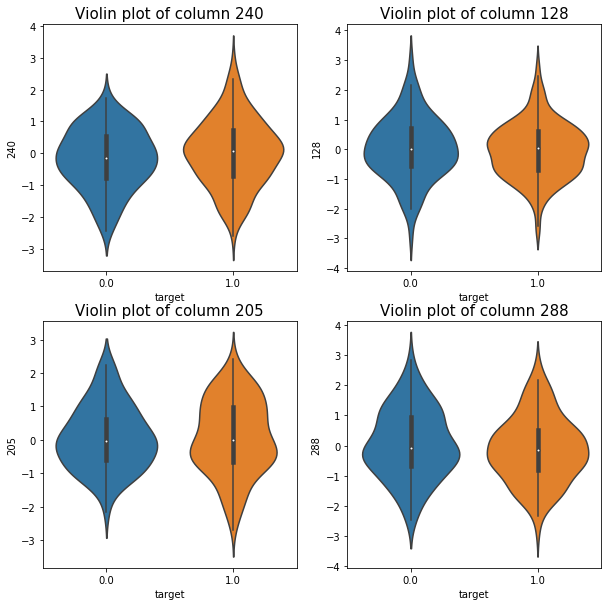

In [238]:
# Seaborn boxplot:- https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

print('Box Plot')

fig, axes = plt.subplots(2,2, figsize=(10,10))

for i in range(2):
    for j in range(2):
        r = np.random.randint(0,299,1)
         
        sns.violinplot(x=train['target'], y=train[str(r[0])], ax=axes[i,j])
        
        axes[i,j].set_title('Violin plot of column {}'.format(r[0]), fontsize= 15)
plt.show()

No major conclusion can be taken from violin plots

## Visulalization of Data

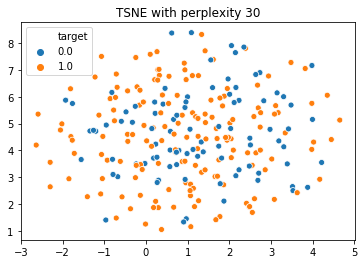

In [245]:
# TSNE refer:- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
# https://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend

train_tsne = TSNE(n_components=2).fit_transform(train.drop(['target'], axis=1))
sns.scatterplot(train_tsne[:,0], train_tsne[:,1], hue=train['target'])
plt.title('TSNE with perplexity 30')
plt.legend()
plt.show()

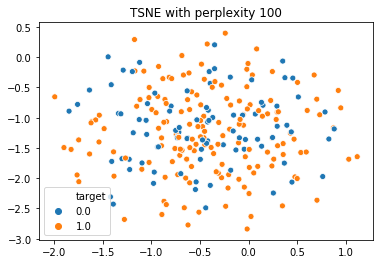

In [249]:
# TSNE refer:- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
# https://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend

train_tsne = TSNE(n_components=2, perplexity=100).fit_transform(train.drop(['target'], axis=1))
sns.scatterplot(train_tsne[:,0], train_tsne[:,1], hue=train['target'])
plt.title('TSNE with perplexity 100')
plt.legend()
plt.show()

## Visulalization using SVD

In [256]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components= 2)
train_svd = svd.fit_transform(train.drop(['target'], axis=1)) 
print(train_svd.shape)

(250, 2)


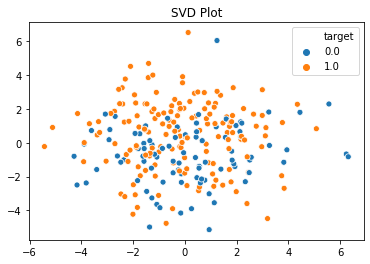

In [257]:
sns.scatterplot(train_svd[:,0], train_svd[:,1], hue=train['target'])
plt.title('SVD Plot')
plt.legend()
plt.show()

## Visulalization using SVD

In [258]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
train_pca = pca.fit_transform(train.drop(['target'], axis=1)) 
print(train_pca.shape)

(250, 2)


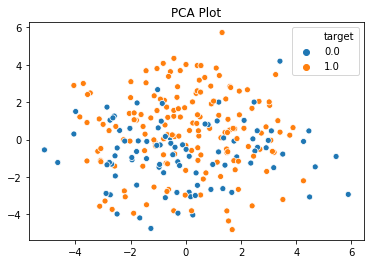

In [259]:
sns.scatterplot(train_pca[:,0], train_pca[:,1], hue=train['target'])
plt.title('PCA Plot')
plt.legend()
plt.show()

Seems like the data set is higly overlapping and non linear

# Conclusions

    1. Class:- Distribution: Not highly imbalanced, but decent imabalancy is there in the dataset

    2. Desribe:- Seems like data set is already scaled to some extent, since min and max value of each feature is greater than -5 and less than 5, even the mean of each feature has similar distribution 

    3. From PDF observation, Most of the feature follows similar distribution(gaussian Distribution).

    4. From CDF observation, most of the feature have same CDF Plot distribution.

    5. From Boxplot observation, we conclude that, medians of each feature are very similar i.e. Few of the features have outliers.
    6. From Violinplot observation, median of each features seems to lie in the same position
 
    7.From visualization plots of PCA and TSNE, we conclude, the dataset is higly overlapping and non-linear